<a href="https://colab.research.google.com/github/GautierBlandin/deep-learning-notebooks/blob/main/keras_intro_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doawnload and Preprocess the dataset

In [ ]:
# Download the Fashion MINST dataset

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# MinMax Scale using sklearn preprocessing

from sklearn.preprocessing import MinMaxScaler

X_train_reshaped = X_train_full.reshape((len(X_train_full), 784))

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape((60000, 28, 28))

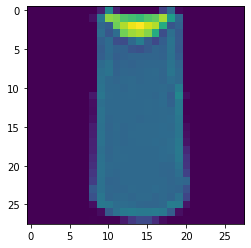

In [ ]:
# View an image from the dataset 
import matplotlib.pyplot as plt

plt.imshow(X_train_scaled[2])

In [ ]:
# Split the set into train/validation using sklearn

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_full, test_size = 0.2, random_state = 42)

# Create and use a deep learning model

In [ ]:
# Create a sequential deep learning model using keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [ ]:
# See a summary of the model

model.summary()

In [ ]:
# Get a list of the model's layers

model.layers

In [ ]:
# Compile the model to specify the loss function and the optimizer to use.

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# Train the model and see its performance on the training set

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7474 - accuracy: 0.7549 - val_loss: 0.5393 - val_accuracy: 0.8128
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4968 - accuracy: 0.8287 - val_loss: 0.4956 - val_accuracy: 0.8246
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4511 - accuracy: 0.8428 - val_loss: 0.4457 - val_accuracy: 0.8415
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4220 - accuracy: 0.8518 - val_loss: 0.4135 - val_accuracy: 0.8553
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4012 - accuracy: 0.8595 - val_loss: 0.4044 - val_accuracy: 0.8572
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3855 - accuracy: 0.8644 - val_loss: 0.3916 - val_accuracy: 0.8627
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3722 - accuracy: 0.8688 - val_loss: 0.3908 - val_accuracy:

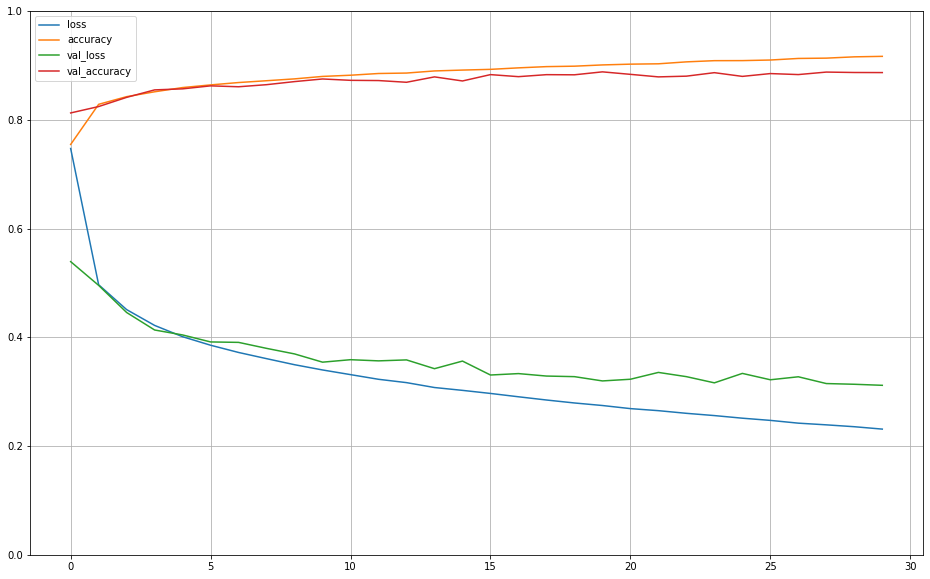

In [ ]:
# Visualize the performance of the model throughout its training

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(16,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0 - 1]
plt.show()

In [ ]:
# Evaluate the model on the training set

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 70.2536 - accuracy: 0.8371


[70.25360870361328, 0.8371000289916992]